# 2A.eco - Web-Scraping - pokemon

Il faut récupérer automatiquement des images de pokémon depuis le site [pokemondb.net](https://pokemondb.net/pokedex/national).

Pour cet exercice, nous vous demandons d'obtenir 1) les informations personnelles des 721 pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Pokemon Database](http://pokemondb.net/pokedex/nincada).

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

## Correction

In [1]:
import urllib
import bs4
import collections
import pandas as pd

# pour le site que nous utilisons, le user agent de python 3 n'est pas  bien passé :
# on le change donc pour celui de Mozilla

req = urllib.request.Request('http://pokemondb.net/pokedex/national', 
                             headers={'User-Agent': 'Mozilla/5.0'})
html = urllib.request.urlopen(req).read()
page = bs4.BeautifulSoup(html, "lxml")

# récupérer la liste des noms de pokémon

liste_pokemon =[]
for pokemon in page.findAll('span', {'class': 'infocard-lg-img'}) : 
    pokemon = pokemon.find('a').get('href').replace("/pokedex/",'')
    liste_pokemon.append(pokemon)

## Fonction pour obtenir les caractéristiques de pokemons

In [2]:
def get_page(pokemon_name):
    url_pokemon = 'http://pokemondb.net/pokedex/'+ pokemon_name
    req = urllib.request.Request(url_pokemon, headers = {'User-Agent' : 'Mozilla/5.0'})
    html = urllib.request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")
     
    
def get_cara_pokemon(pokemon_name):
    page = get_page(pokemon_name)
    data = collections.defaultdict()
    
    # table Pokédex data, Training, Breeding, base Stats
    
    for table in page.findAll('table', { 'class' : "vitals-table"})[0:4] :
        table_body = table.find('tbody')
        for rows in table_body.findChildren(['tr']) : 
            if len(rows) > 1 : # attention aux tr qui ne contiennent rien
                column = rows.findChild('th').getText()
                cells = rows.findChild('td').getText()
                cells = cells.replace('\t','').replace('\n',' ')
                data[column] = cells
                data['name'] = pokemon_name
    return dict(data)
       
items = []       
for e, pokemon in enumerate(liste_pokemon) : 
    print(e, pokemon)
    item = get_cara_pokemon(pokemon)       
    items.append(item)
    if e > 20:
        break
df = pd.DataFrame(items)
df.head()

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree
12 weedle
13 kakuna
14 beedrill
15 pidgey
16 pidgeotto
17 pidgeot
18 rattata
19 raticate
20 spearow
21 fearow


,National №,name,Type,Species,Height,Weight,Abilities,Local №,EV yield,Catch rate,...,Growth Rate,Egg Groups,Gender,Egg cycles,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,bulbasaur,Grass Poison,Seed Pokémon,0.7 m (2′04″),6.9 kg (15.2 lbs),1. OvergrowChlorophyll (hidden ability),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,1 Special Attack,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",45,49,49,65,65,45
1,002,ivysaur,Grass Poison,Seed Pokémon,1.0 m (3′03″),13.0 kg (28.7 lbs),1. OvergrowChlorophyll (hidden ability),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",60,62,63,80,80,60
2,003,venusaur,Grass Poison,Seed Pokémon,2.0 m (6′07″),100.0 kg (220.5 lbs),1. OvergrowChlorophyll (hidden ability),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,"2 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",80,82,83,100,100,80
3,004,charmander,Fire,Lizard Pokémon,0.6 m (2′00″),8.5 kg (18.7 lbs),1. BlazeSolar Power (hidden ability),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,1 Speed,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",39,52,43,60,50,65
4,005,charmeleon,Fire,Flame Pokémon,1.1 m (3′07″),19.0 kg (41.9 lbs),1. BlazeSolar Power (hidden ability),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Speed","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",58,64,58,80,65,80


## les images de pokemon

In [3]:
import shutil
import requests


for e, pokemon in enumerate(liste_pokemon) : 
    print(e,pokemon)
    url = "https://img.pokemondb.net/artwork/{}.jpg".format(pokemon)
    response = requests.get(url, stream=True)
    # avec l'option stream, on ne télécharge pas l'objet de l'url
    with open('{}.jpg'.format(pokemon), 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    if e > 20:
        break        

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree
12 weedle
13 kakuna
14 beedrill
15 pidgey
16 pidgeotto
17 pidgeot
18 rattata
19 raticate
20 spearow
21 fearow


In [4]:
import os
names = [name for name in os.listdir('.') if '.jpg' in name]
names[:3]

['beedrill.jpg', 'blastoise.jpg', 'bulbasaur.jpg']

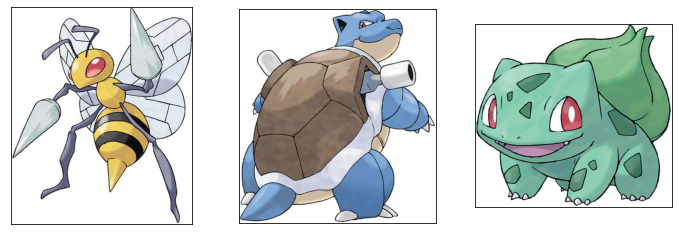

In [5]:
import matplotlib.pyplot as plt
import skimage.io as imio

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, name in enumerate(names[:ax.shape[0]]):
    img = imio.imread(name)
    ax[i].imshow(img)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)